In [4]:
import utils

In [3]:
stats_dir = "/home/nickpestell/tmp/viewbovis_stats/"

In [38]:
def bar_chart(df_stats, start_date=None, end_date=None):
    if start_date==None:
        start_date = df_stats.index[0]
    if end_date==None:
        end_date = df_stats.index[-1]
    return df_stats.loc[start_date:end_date].sort_index().plot.bar(figsize=(16, 10), subplots=True, rot=80)

here
2023-08-31


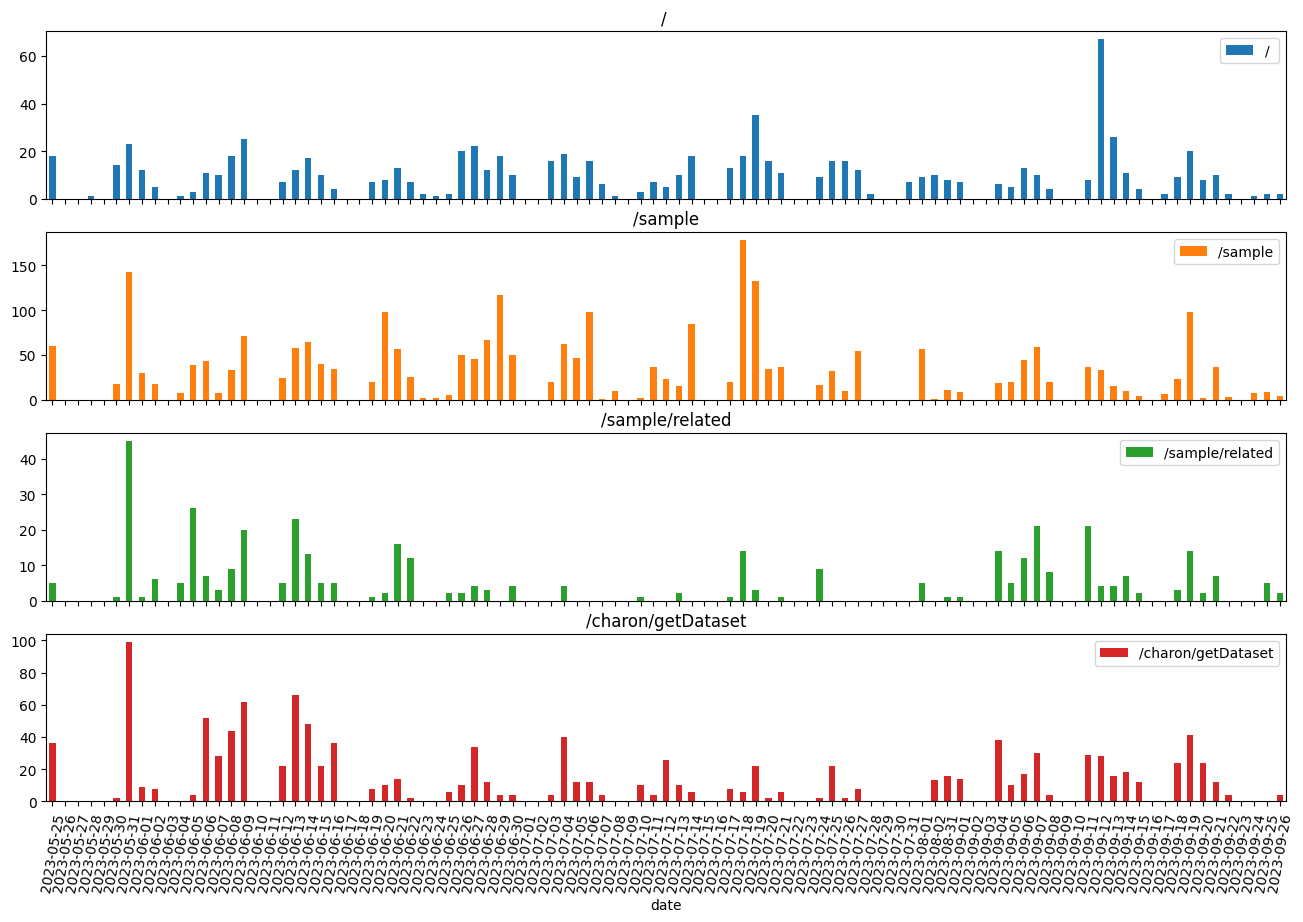

In [40]:
df_stats = utils.build_stats_df(stats_dir)
ax = bar_chart(df_stats)